### 1 New York Stock Exchange (NYSE) data (1962-1986) (10 pts)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
# Load the pandas library
import pandas as pd
# Load numpy for array manipulation
import numpy as np
# Load seaborn plotting library
import seaborn as sns
import matplotlib.pyplot as plt
# For read file from url
import io
import requests

# Set font sizes in plots
sns.set(font_scale = 1.)
# Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read in NYSE data from url
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/NYSE.csv"
s = requests.get(url).content.decode('utf-8')
NYSE = pd.read_csv(io.StringIO(s), index_col = 0)
NYSE

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True
...,...,...,...,...,...
1986-12-24,wed,0.006514,-0.236104,-9.807366,False
1986-12-26,fri,0.001825,-1.322425,-9.906025,False
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False


<Figure size 432x288 with 0 Axes>

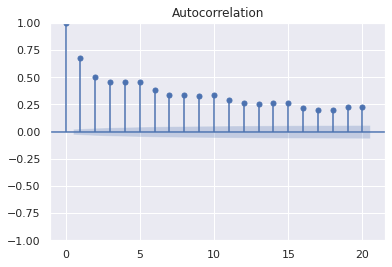

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
plot_acf(NYSE['log_volume'], lags = 20)
plt.show()

In [ ]:
data=NYSE.copy()
# Define the range of lags to use
lags = range(0, 21)

# Create new columns with the Dow Jones returns and log volatility shifted by the specified lags
for lag in lags:
    data[f'lagged_DJ_return_{lag}'] = data['DJ_return'].shift(lag)
    data[f'lagged_log_volatility_{lag}'] = data['log_volatility'].shift(lag)
data

,day_of_week,DJ_return,log_volume,log_volatility,train,lagged_DJ_return_0,lagged_log_volatility_0,lagged_DJ_return_1,lagged_log_volatility_1,lagged_DJ_return_2,lagged_log_volatility_2,lagged_DJ_return_3,lagged_log_volatility_3,lagged_DJ_return_4,lagged_log_volatility_4,lagged_DJ_return_5,lagged_log_volatility_5,lagged_DJ_return_6,lagged_log_volatility_6,lagged_DJ_return_7,lagged_log_volatility_7,lagged_DJ_return_8,lagged_log_volatility_8,lagged_DJ_return_9,lagged_log_volatility_9,lagged_DJ_return_10,lagged_log_volatility_10,lagged_DJ_return_11,lagged_log_volatility_11,lagged_DJ_return_12,lagged_log_volatility_12,lagged_DJ_return_13,lagged_log_volatility_13,lagged_DJ_return_14,lagged_log_volatility_14,lagged_DJ_return_15,lagged_log_volatility_15,lagged_DJ_return_16,lagged_log_volatility_16,lagged_DJ_return_17,lagged_log_volatility_17,lagged_DJ_return_18,lagged_log_volatility_18,lagged_DJ_return_19,lagged_log_volatility_19,lagged_DJ_return_20,lagged_log_volatility_20
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True,-0.004461,-13.127403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-04,tues,0.007813,0.346202,-11.749305,True,0.007813,-11.749305,-0.004461,-13.127403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-05,wed,0.003845,0.525306,-11.665609,True,0.003845,-11.665609,0.007813,-11.749305,-0.004461,-13.127403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-06,thur,-0.003462,0.210182,-11.626772,True,-0.003462,-11.626772,0.003845,-11.665609,0.007813,-11.749305,-0.004461,-13.127403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-07,fri,0.000568,0.044187,-11.728130,True,0.000568,-11.728130,-0.003462,-11.626772,0.003845,-11.665609,0.007813,-11.749305,-0.004461,-13.127403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,wed,0.006514,-0.236104,-9.807366,False,0.006514,-9.807366,-0.006150,-9.782214,-0.001385,-9.746214,0.008345,-9.644138,-0.002866,-9.652473,-0.009262,-9.559975,0.006919,-9.584372,0.005502,-9.551137,-0.005939,-9.489271,-0.004813,-9.431645,0.008328,-9.355608,-0.006945,-9.333840,0.002698,-9.284605,-0.007571,-9.187113,-0.003900,-9.139386,-0.004253,-9.048297,0.022250,-8.958441,-0.000883,-9.338898,-0.001321,-9.234425,0.002424,-9.130854,0.003169,-9.030933
1986-12-26,fri,0.001825,-1.322425,-9.906025,False,0.001825,-9.906025,0.006514,-9.807366,-0.006150,-9.782214,-0.001385,-9.746214,0.008345,-9.644138,-0.002866,-9.652473,-0.009262,-9.559975,0.006919,-9.584372,0.005502,-9.551137,-0.005939,-9.489271,-0.004813,-9.431645,0.008328,-9.355608,-0.006945,-9.333840,0.002698,-9.284605,-0.007571,-9.187113,-0.003900,-9.139386,-0.004253,-9.048297,0.022250,-8.958441,-0.000883,-9.338898,-0.001321,-9.234425,0.002424,-9.130854
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False,-0.009515,-9.827660,0.001825,-9.906025,0.006514,-9.807366,-0.006150,-9.782214,-0.001385,-9.746214,0.008345,-9.644138,-0.002866,-9.652473,-0.009262,-9.559975,0.006919,-9.584372,0.005502,-9.551137,-0.005939,-9.489271,-0.004813,-9.431645,0.008328,-9.355608,-0.006945,-9.333840,0.002698,-9.284605,-0.007571,-9.187113,-0.003900,-9.139386,-0.004253,-9.048297,0.022250,-8.958441,-0.000883,-9.338898,-0.001321,-9.234425


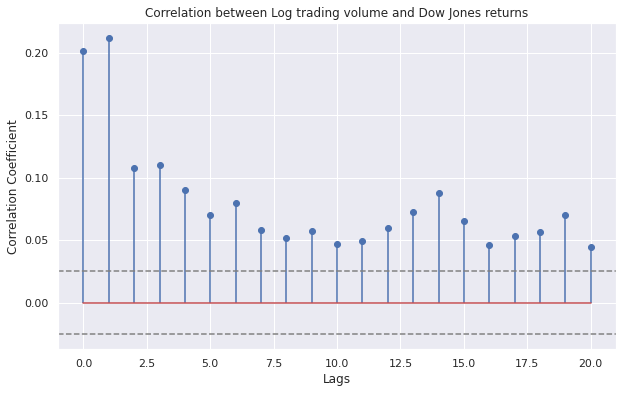

In [ ]:
# Create a list of correlation coefficients for each lag
correlations_dj = [data['log_volume'].corr(data[f'lagged_DJ_return_{lag}']) for lag in lags]

# Calculate the 95% confidence intervals for the correlations
n = len(data)
conf_intervals = 1.96 / np.sqrt(n)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(lags, correlations_dj, use_line_collection=True)
ax.axhline(y=conf_intervals, linestyle='--', color='gray')
ax.axhline(y=-conf_intervals, linestyle='--', color='gray')
ax.set_xlabel('Lags')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation between Log trading volume and Dow Jones returns')
plt.show()

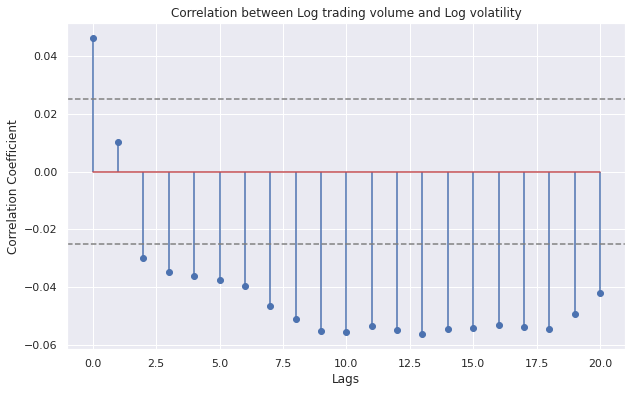

In [ ]:
# Create a list of correlation coefficients for each lag
correlations_lv = [data['log_volume'].corr(data[f'lagged_log_volatility_{lag}']) for lag in lags]

# Calculate the 95% confidence intervals for the correlations
n = len(data)
conf_intervals = 1.96 / np.sqrt(n)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(lags, correlations_lv, use_line_collection=True)
ax.axhline(y=conf_intervals, linestyle='--', color='gray')
ax.axhline(y=-conf_intervals, linestyle='--', color='gray')
ax.set_xlabel('Lags')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation between Log trading volume and Log volatility')
plt.show()

In [ ]:
# Split the data into train and test sets
train_data = NYSE[NYSE['train'] == True]
test_data = NYSE[NYSE['train'] == False]

In [ ]:
train_data

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True
...,...,...,...,...,...
1979-12-24,mon,0.000298,-0.631830,-10.385307,True
1979-12-26,wed,-0.001216,-0.365829,-10.485360,True
1979-12-27,thur,0.002336,-0.137014,-10.569258,True


### 3 Baseline method (20 pts)

In [ ]:
from sklearn.metrics import r2_score

# Get yesterday's log trading volume as the predicted value
yesterday_volume = test_data['log_volume'].shift(1)
yesterday_volume[0] = train_data['log_volume'].iloc[-1]  # set the first value to the last value of train

# Evaluate R square
r2_strawman = r2_score(test_data['log_volume'], yesterday_volume)
print(f"R square of straw man method: {r2_strawman:.4f}")

R square of straw man method: 0.1803


In [ ]:
# Get yesterday's log trading volume as the predicted value
yesterday_volume2 = train_data['log_volume'].shift(1)
yesterday_volume2 = yesterday_volume2.dropna()

# Evaluate R square
r2_strawman_train = r2_score(train_data['log_volume'][1:4281], yesterday_volume2)
print(f"R square of straw man method (train data): {r2_strawman_train:.4f}")

R square of straw man method (train data): 0.4200


### 4 Autoregression (AR) forecaster (30 pts)

In [ ]:
data2=NYSE.copy()
# Define the range of lags to use
lags2 = range(1, 6)

# Create new columns with the Dow Jones returns and log volatility shifted by the specified lags
for lag in lags2:
    data2[f'lagged_DJ_return_{lag}'] = data2['DJ_return'].shift(lag)
    data2[f'lagged_log_volatility_{lag}'] = data2['log_volatility'].shift(lag)
    data2[f'lagged_log_volume_{lag}'] = data2['log_volume'].shift(lag)
data2

,day_of_week,DJ_return,log_volume,log_volatility,train,lagged_DJ_return_1,lagged_log_volatility_1,lagged_log_volume_1,lagged_DJ_return_2,lagged_log_volatility_2,lagged_log_volume_2,lagged_DJ_return_3,lagged_log_volatility_3,lagged_log_volume_3,lagged_DJ_return_4,lagged_log_volatility_4,lagged_log_volume_4,lagged_DJ_return_5,lagged_log_volatility_5,lagged_log_volume_5
date,,,,,,,,,,,,,,,,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-04,tues,0.007813,0.346202,-11.749305,True,-0.004461,-13.127403,0.032573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-05,wed,0.003845,0.525306,-11.665609,True,0.007813,-11.749305,0.346202,-0.004461,-13.127403,0.032573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-06,thur,-0.003462,0.210182,-11.626772,True,0.003845,-11.665609,0.525306,0.007813,-11.749305,0.346202,-0.004461,-13.127403,0.032573,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-07,fri,0.000568,0.044187,-11.728130,True,-0.003462,-11.626772,0.210182,0.003845,-11.665609,0.525306,0.007813,-11.749305,0.346202,-0.004461,-13.127403,0.032573,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,wed,0.006514,-0.236104,-9.807366,False,-0.006150,-9.782214,0.450780,-0.001385,-9.746214,0.366152,0.008345,-9.644138,0.986704,-0.002866,-9.652473,0.025079,-0.009262,-9.559975,-0.043366
1986-12-26,fri,0.001825,-1.322425,-9.906025,False,0.006514,-9.807366,-0.236104,-0.006150,-9.782214,0.450780,-0.001385,-9.746214,0.366152,0.008345,-9.644138,0.986704,-0.002866,-9.652473,0.025079
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False,0.001825,-9.906025,-1.322425,0.006514,-9.807366,-0.236104,-0.006150,-9.782214,0.450780,-0.001385,-9.746214,0.366152,0.008345,-9.644138,0.986704


In [ ]:
# Split the data into train and test sets
train_data2 = data2[data2['train'] == True]
test_data2 = data2[data2['train'] == False]

In [ ]:
X_train = train_data2.drop(['day_of_week','DJ_return','log_volume','log_volatility','train'], axis=1).dropna()
y_train = train_data2['log_volume'][5:]

In [ ]:
X_test = test_data2.drop(['day_of_week','DJ_return','log_volume','log_volatility','train'], axis=1)
y_test = test_data2['log_volume']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardization transformer
scalar = StandardScaler()

In [ ]:
from sklearn.linear_model import ElasticNet

# Set up the elastic net model
elastic_net = ElasticNet(max_iter=10000)

In [ ]:
pipe_ar = Pipeline(steps = [
  ("std_tf", scalar), 
  ("model", elastic_net)
  ])

In [ ]:
# Define the hyperparameter grid to search over
param_grid_ar = {'model__alpha': np.logspace(start = -10, stop = -4, base = 10, num = 100),
              'model__l1_ratio': [0, 0.1,0.2 , 0.3, 0.4, 0.5,0.6, 0.7, 0.9, 1]}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# Set up the time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

In [ ]:
# Set up the grid search with cross-validation
search_ar = GridSearchCV(pipe_ar, param_grid=param_grid_ar, cv=tscv, scoring='r2',refit=True,verbose=1)

# Fit the grid search to the training data
search_ar.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('std_tf', StandardScaler()),
                                       ('model', ElasticNet(max_iter=10000))]),
             param_grid={'model__alpha': array([1.00000000e-10, 1.14975700e-10, 1.32194115e-10, 1.51991108e-10,
       1.74752840e-10, 2.00923300e-10, 2.31012970e-10, 2.65608778e-10,
       3.05385551e-10, 3.5...
       7.05480231e-06, 8.11130831e-06, 9.32603347e-06, 1.07226722e-05,
       1.23284674e-05, 1.41747416e-05, 1.62975083e-05, 1.87381742e-05,
       2.15443469e-05, 2.47707636e-05, 2.84803587e-05, 3.27454916e-05,
       3.76493581e-05, 4.32876128e-05, 4.97702356e-05, 5.72236766e-05,
       6.57933225e-05, 7.56463328e-05, 8.69749003e-05, 1.00000000e-04]),
                         'model__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                             0.7, 0.9, 1]},
             scoring='r2', verbose=1)

In [ ]:
search_ar.best_score_

0.5477263774419682

In [ ]:
model_ar_best=search_ar.best_estimator_

In [ ]:
r2_ar = r2_score(y_test, search_ar.best_estimator_.predict(X_test))
print(f"R square of Autoregression (AR) forecaster method: {r2_ar:.4f}")

R square of Autoregression (AR) forecaster method: 0.4129


In [ ]:
r2_ar_cv=search_ar.best_score_
print(f"CV R square of Autoregression (AR) forecaster method: {r2_ar_cv:.4f}")

CV R square of Autoregression (AR) forecaster method: 0.5477


### 5 Autoregression by MLP (30 pts)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_mod = MLPClassifier(
  hidden_layer_sizes = (8, 4),
  activation = 'relu',
  solver = 'adam',
  batch_size = 16,
  random_state = 425
  )

In [ ]:
from sklearn.neural_network import MLPRegressor

# Train an MLP model 
mlp_mod = MLPRegressor(hidden_layer_sizes=(8,4), 
                         activation='relu', 
                         solver='adam', 
                         alpha=0.001, 
                         batch_size = 16,
                         random_state=42)


In [ ]:
pipe_mlp = Pipeline(steps = [
  ("std", scalar),
  ("model", mlp_mod)
  ])

In [ ]:
bs_grid = [4, 8, 12, 16, 20, 24, 28, 32] # batch sizes
param_grid_mlp = {
    'model__hidden_layer_sizes': [(4), (8), (12), (4, 2), (8, 4), (12, 6)],
    'model__activation': ['tanh', 'relu'],
    'model__alpha': [0.0001, 0.001, 0.01],
    "model__batch_size": bs_grid
}

In [ ]:
# Set up CV
search_mlp = GridSearchCV(
  pipe_mlp,
  param_grid_mlp,
  cv = tscv, 
  scoring = "r2",
  # Refit the best model on the whole data set
  refit = True,
    verbose=2
  )

In [ ]:
# Fit CV
search_mlp.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=4; total time=   2.9s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=4; total time=   3.8s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=4; total time=   7.1s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=8; total time=   3.1s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=8; total time=   3.6s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=8; total time=   6.3s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, model__hidden_layer_sizes=12; total time=   3.9s
[CV] END model__activation=tanh, model__alpha=0.0001, model__batch_size=4, 

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('model',
                                        MLPRegressor(alpha=0.001, batch_size=16,
                                                     hidden_layer_sizes=(8, 4),
                                                     random_state=42))]),
             param_grid={'model__activation': ['tanh', 'relu'],
                         'model__alpha': [0.0001, 0.001, 0.01],
                         'model__batch_size': [4, 8, 12, 16, 20, 24, 28, 32],
                         'model__hidden_layer_sizes': [4, 8, 12, (4, 2), (8, 4),
                                                       (12, 6)]},
             scoring='r2', verbose=2)

In [ ]:
search_mlp.best_score_

0.5573906886638962

In [ ]:
model_mlp_best=search_mlp.best_estimator_

In [ ]:
r2_mlp = r2_score(y_test, search_mlp.best_estimator_.predict(X_test))
print(f"R square of Autoregression by MLP method: {r2_mlp:.4f}")

R square of Autoregression by MLP method: 0.3980


In [ ]:
r2_mlp_cv=search_mlp.best_score_
print(f"CV R square of Autoregression by MLP method: {r2_mlp_cv:.4f}")

CV R square of Autoregression by MLP method: 0.5574


### 6 LSTM forecaster (30 pts)

In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler

train_data['DJ_return2']=train_data['DJ_return']
test_data['DJ_return2']=test_data['DJ_return']
scaler2 = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler2.fit_transform(train_data.drop(['day_of_week','train'], axis=1))
test_data_scaled = scaler2.transform(test_data.drop(['day_of_week','train'], axis=1))



In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
              dataX.append(dataset[i - n_past:i, 1:])
              dataY.append(dataset[i,1])
    return np.array(dataX),np.array(dataY)
 
X_train_scaled, y_train_scaled=createXY(train_data_scaled,5)
X_test_scaled,y_test_scaled=createXY(test_data_scaled,5)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
# Define function to create LSTM model
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(5,3)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
 
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

In [ ]:

lstm = KerasRegressor(build_fn=build_model,verbose=1)
parameters = {'batch_size' : [16,20],
            'epochs' : [8,10],
            'optimizer' : ['adam','Adadelta'] }
 
grid_search_lstm = GridSearchCV(estimator = lstm,
                          param_grid = parameters,
                                cv=tscv,
                                scoring='r2',
                                verbose=2)



In [ ]:
# Fit grid search object to training data
grid_search_lstm.fit(X_train_scaled, y_train_scaled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Epoch 1/8
67/67 [==============================] - 5s 8ms/step - loss: 0.0339
Epoch 2/8
67/67 [==============================] - 1s 8ms/step - loss: 0.0096
Epoch 3/8
67/67 [==============================] - 1s 9ms/step - loss: 0.0084
Epoch 4/8
67/67 [==============================] - 1s 9ms/step - loss: 0.0083
Epoch 5/8
67/67 [==============================] - 1s 9ms/step - loss: 0.0075
Epoch 6/8
67/67 [==============================] - 1s 12ms/step - loss: 0.0076
Epoch 7/8
67/67 [==============================] - 1s 13ms/step - loss: 0.0077
Epoch 8/8
67/67 [==============================] - 1s 3ms/step
[CV] END ............batch_size=16, epochs=8, optimizer=adam; total time=  16.1s
Epoch 1/8
134/134 [==============================] - 5s 10ms/step - loss: 0.0189
Epoch 2/8
134/134 [==============================] - 2s 13ms/step - loss: 0.0085
Epoch 3/8
134/134 [==============================] - 2s 13ms/step - loss: 0.0082
Epoch

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f43ce4d1970>,
             param_grid={'batch_size': [16, 20], 'epochs': [8, 10],
                         'optimizer': ['adam', 'Adadelta']},
             scoring='r2', verbose=2)

In [ ]:
grid_search_lstm.best_score_

0.4545192416804856

In [ ]:
model_lstm_best=grid_search_lstm.best_estimator_

In [ ]:
r2_lstm = r2_score(y_test_scaled, grid_search_lstm.best_estimator_.predict(X_test_scaled))
print(f"R square of LSTM method: {r2_lstm:.4f}")

111/111 [==============================] - 2s 4ms/step
R square of LSTM method: 0.3954


In [ ]:
r2_lstm_cv=grid_search_lstm.best_score_
print(f"CV R square of LSTM method: {r2_lstm_cv:.4f}")

CV R square of LSTM method: 0.4545


In [ ]:
import pickle
pickle.dump(model_ar_best,open(r"./armodel.dat",'wb'))
pickle.dump(model_mlp_best,open(r"./mlpmodel.dat",'wb'))
pickle.dump(model_lstm_best,open(r"./lstmmodel.dat",'wb'))


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-10 06:57:58           64
variables.h5                                   2023-03-10 06:57:58       400880
config.json                                    2023-03-10 06:57:58  

### 7 Random forest forecaster (30pts)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_mod =  RandomForestRegressor(
  # Number of trees
  n_estimators = 100, 
  criterion = 'squared_error',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [ ]:
pipe_rf = Pipeline(steps = [
  ("model", rf_mod)
  ])

In [ ]:
# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters_rf = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }


In [ ]:
search_rf = GridSearchCV(
  pipe_rf,
  tuned_parameters_rf,
  cv = tscv, 
  scoring = "r2",
  # Refit the best model on the whole data set
  refit = True,
  verbose=2
  )

In [ ]:
# Fit CV
search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...model__max_features=sqrt, model__n_estimators=50; total time=   0.3s
[CV] END ...model__max_features=sqrt, model__n_estimators=50; total time=   0.5s
[CV] END ...model__max_features=sqrt, model__n_estimators=50; total time=   0.6s
[CV] END ..model__max_features=sqrt, model__n_estimators=100; total time=   0.5s
[CV] END ..model__max_features=sqrt, model__n_estimators=100; total time=   1.7s
[CV] END ..model__max_features=sqrt, model__n_estimators=100; total time=   1.5s
[CV] END ..model__max_features=sqrt, model__n_estimators=150; total time=   1.1s
[CV] END ..model__max_features=sqrt, model__n_estimators=150; total time=   1.9s
[CV] END ..model__max_features=sqrt, model__n_estimators=150; total time=   2.1s
[CV] END ..model__max_features=sqrt, model__n_estimators=200; total time=   1.0s
[CV] END ..model__max_features=sqrt, model__n_estimators=200; total time=   1.7s
[CV] END ..model__max_features=sqrt, model__n_es

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(max_features='sqrt',
                                                              oob_score=True,
                                                              random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='r2', verbose=2)

<Figure size 432x288 with 0 Axes>

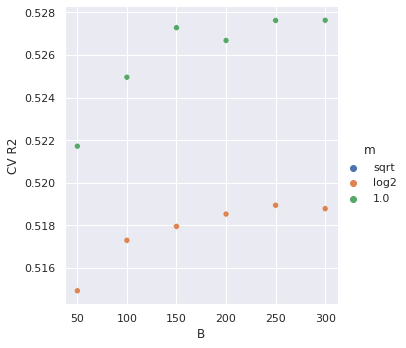

In [ ]:
cv_res = pd.DataFrame({
  "B": np.array(search_rf.cv_results_["param_model__n_estimators"]),
  "r2": search_rf.cv_results_["mean_test_score"],
  "m": search_rf.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "r2",
  hue = "m",
  ).set(
    xlabel = "B",
    ylabel = "CV R2"
);
plt.show()

In [ ]:
search_rf.best_score_

0.5276301015306247

In [ ]:
model_rf_best=search_rf.best_estimator_

In [ ]:
r2_rf = r2_score(y_test, search_rf.best_estimator_.predict(X_test))
print(f"R square of Random forest method: {r2_rf:.4f}")

R square of Random forest method: 0.4004


In [ ]:
r2_rf_cv=search_rf.best_score_
print(f"CV R square of Random Forest method: {r2_rf_cv:.4f}")

CV R square of Random Forest method: 0.5276


In [ ]:
pickle.dump(model_rf_best,open(r"./rfmodel.dat",'wb'))

### 8 Boosting forecaster (30pts)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

bst_mod =  AdaBoostRegressor(
  # Default base estimator is DecisionTreeRegressor with max_depth = 3
  estimator = DecisionTreeRegressor(max_depth = 3),
  # Number of trees (to be tuned)
  n_estimators = 50, 
  # Learning rate (to be tuned)
  learning_rate = 1.0,
  random_state = 425
  )

In [ ]:
pipe_bst = Pipeline(steps = [
  ("model", bst_mod)
  ])

In [ ]:
# Tune hyper-parameter(s)
d_grid = [
  DecisionTreeRegressor(max_depth = 1),
  DecisionTreeRegressor(max_depth = 2),
  DecisionTreeRegressor(max_depth = 3),
  DecisionTreeRegressor(max_depth = 4)
  ]
B_grid = [50, 100, 150, 200, 250, 300, 350, 400]
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters_bst = {
  "model__estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }

In [ ]:
search_bst = GridSearchCV(
  pipe_bst,
  tuned_parameters_bst,
  cv = tscv, 
  scoring = "r2",
  # Refit the best model on the whole data set
  refit = True,
  verbose=2
  )

In [ ]:
# Fit CV
search_bst.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=50; total time=   0.5s
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=50; total time=   0.6s
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=50; total time=   0.6s
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=100; total time=   0.3s
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=100; total time=   0.5s
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=100; total time=   0.9s
[CV] END model__estimator=DecisionTreeRegressor(max_depth=1), model__learning_rate=0.2, model__n_estimators=150; total time=   0.6s
[CV] END model__

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('model',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                                          random_state=425))]),
             param_grid={'model__estimator': [DecisionTreeRegressor(max_depth=1),
                                              DecisionTreeRegressor(max_depth=2),
                                              DecisionTreeRegressor(max_depth=3),
                                              DecisionTreeRegressor(max_depth=4)],
                         'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'model__n_estimators': [50, 100, 150, 200, 250, 300,
                                                 350, 400]},
             scoring='r2', verbose=2)

<Figure size 432x288 with 0 Axes>

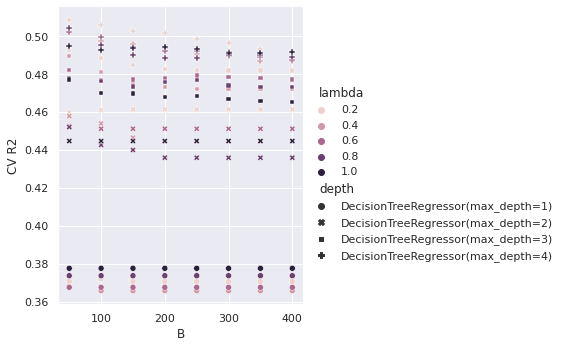

In [ ]:
cv_res = pd.DataFrame({
  "B": np.array(search_bst.cv_results_["param_model__n_estimators"]),
  "r2": search_bst.cv_results_["mean_test_score"],
  "lambda": search_bst.cv_results_["param_model__learning_rate"],
  "depth": search_bst.cv_results_["param_model__estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "r2",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV R2"
);
plt.show()

In [ ]:
search_bst.best_score_

0.5083466533532903

In [ ]:
model_bst_best=search_bst.best_estimator_

In [ ]:
r2_bst = r2_score(y_test, search_bst.best_estimator_.predict(X_test))
print(f"R square of Boosting method: {r2_bst:.4f}")

R square of Boosting method: 0.3561


In [ ]:
r2_bst_cv=search_bst.best_score_
print(f"CV R square of Boosting method: {r2_bst_cv:.4f}")

CV R square of Boosting method: 0.5083


In [ ]:
pickle.dump(model_bst_best,open(r"./bstmodel.dat",'wb'))

### 9 Summary (30pts)

In [ ]:
from prettytable import PrettyTable


table = PrettyTable(['Method', 'CV R2', 'Test R2'])
table.add_row(['Baseline', r2_strawman_train, r2_strawman])
table.add_row(['AR(5)', r2_ar_cv, r2_ar])
table.add_row(['AR(5) MLP', r2_mlp_cv, r2_mlp])
table.add_row(['LSTM', r2_lstm_cv, r2_lstm])
table.add_row(['Random Forest', r2_rf_cv, r2_rf])
table.add_row(['Boosting', r2_bst_cv, r2_bst])
print(table)


+---------------+---------------------+---------------------+
|     Method    |        CV R2        |       Test R2       |
+---------------+---------------------+---------------------+
|    Baseline   | 0.42000813029411965 | 0.18026287838158628 |
|     AR(5)     |  0.5477263774419682 |  0.4128912973465987 |
|   AR(5) MLP   |  0.5573906886638962 | 0.39804853629359194 |
|      LSTM     |  0.4545192416804856 |  0.3953719673636138 |
| Random Forest |  0.5276301015306247 | 0.40038521980904906 |
|    Boosting   |  0.5083466533532903 |  0.3561224405589736 |
+---------------+---------------------+---------------------+


According to the results of Test R2, the AR(5) model is the best.